# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att6'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

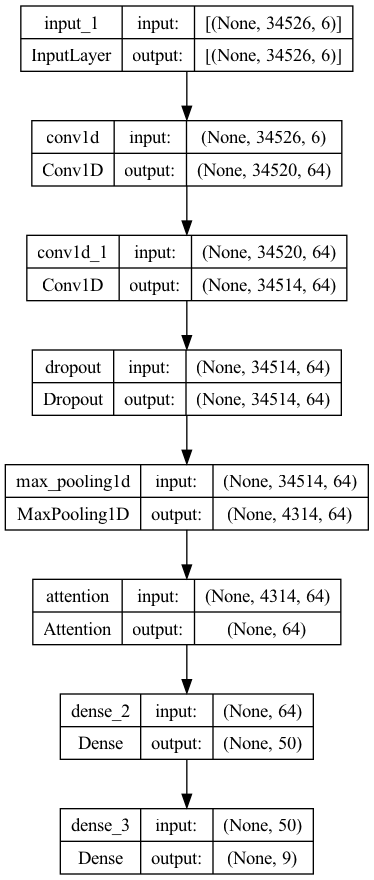

In [4]:
model = CNN(input_size=(max_seq_len, 6),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34526, 6)]        0         
                                                                 
 conv1d (Conv1D)             (None, 34520, 64)         2688      
                                                                 
 conv1d_1 (Conv1D)           (None, 34514, 64)         28672     
                                                                 
 dropout (Dropout)           (None, 34514, 64)         0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 4314, 64)          0         
 D)                                                              
                                                                 
 attention (Attention)       (None, 64)                7920      
                                                             

In [6]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train)

Epoch 1/10
311/311 [==============================] - 303s 954ms/step - loss: 2.6534 - ERM: -0.0785 - KDEL: -0.0320 - LMA: 0.0194 - MITO: -0.0558 - NES: 0.0817 - NIK: 0.0452 - NLS: 0.0250 - NUCP: 0.0099 - OMM: -0.0565 - val_loss: 2.4374 - val_ERM: -0.0800 - val_KDEL: -0.4052 - val_LMA: -0.3054 - val_MITO: -0.3088 - val_NES: 0.1611 - val_NIK: 0.0673 - val_NLS: -0.0874 - val_NUCP: 0.1352 - val_OMM: -0.5746
Epoch 2/10
311/311 [==============================] - 301s 951ms/step - loss: 2.3432 - ERM: -0.0925 - KDEL: -0.0241 - LMA: 0.0084 - MITO: -0.0211 - NES: 0.0906 - NIK: 0.0320 - NLS: 0.0111 - NUCP: -0.0285 - OMM: -3.4935e-04 - val_loss: 2.2838 - val_ERM: -0.0785 - val_KDEL: -0.3943 - val_LMA: -0.3223 - val_MITO: -0.3396 - val_NES: 0.1489 - val_NIK: 0.0547 - val_NLS: -0.0545 - val_NUCP: -0.0833 - val_OMM: -0.5417
Epoch 3/10
311/311 [==============================] - 302s 954ms/step - loss: 2.2836 - ERM: -0.0834 - KDEL: 0.0061 - LMA: 0.0070 - MITO: 0.0375 - NES: 0.0988 - NIK: 0.0597 - NLS:

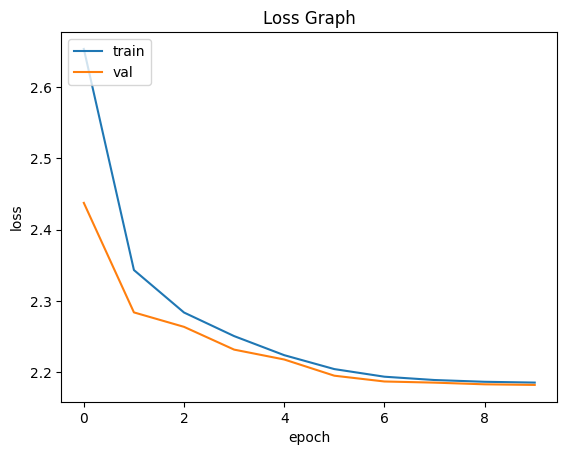

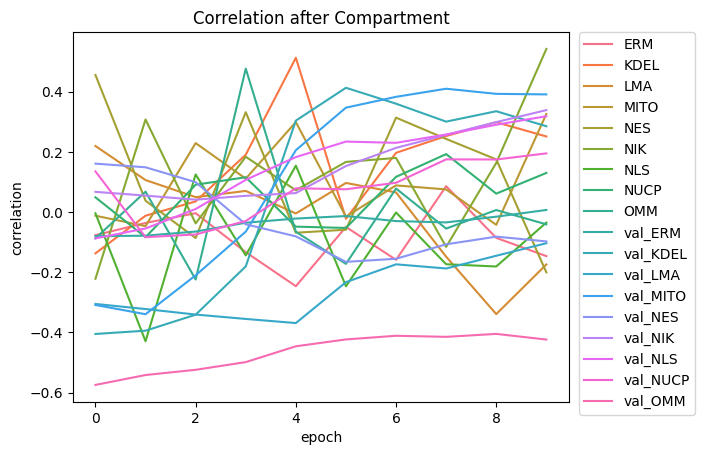

In [7]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

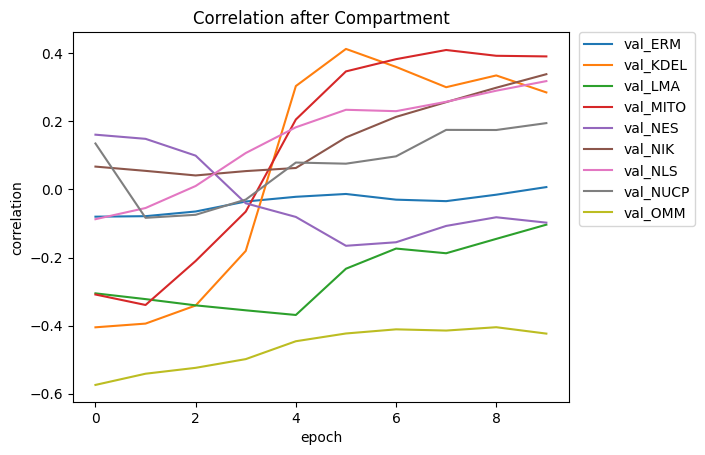

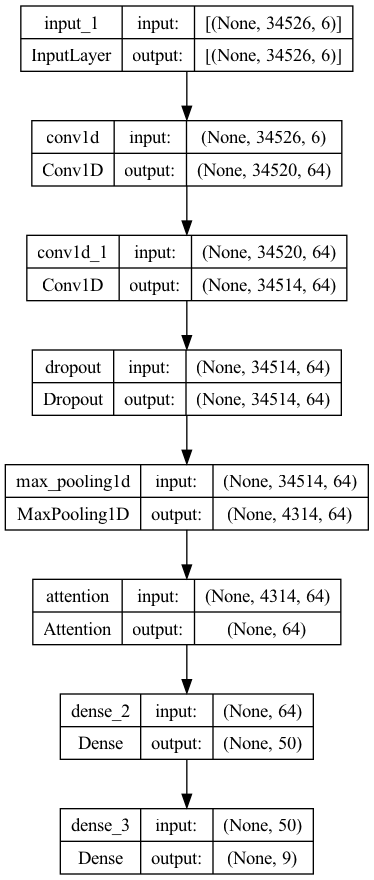

In [8]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)